In [2]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import expectexception

### Read combined dataset to pandas dataframe

In [4]:
df = pd.read_csv("../data/combinedData.csv")
provider = pd.read_csv("../data/train.csv")
provider_test = pd.read_csv("../data/test.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,14,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df = df.merge(provider,on="Provider", how="left")

In [6]:
df.shape

(693603, 65)

In [7]:
df.groupby("PotentialFraud").size()

PotentialFraud
No     345415
Yes    212796
dtype: int64

In [8]:
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No


In [9]:
provider_test.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [10]:
provider.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [11]:
df.shape

(693603, 65)

### Creating df1 with new column "conditions"

In [12]:
df1 = df

In [13]:
illness = df1[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
           ]]

In [14]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,1,1,1,1,0,0,0,0
1,CLM66048,1,1,1,1,1,1,1,0,0,0,0
2,CLM68358,1,1,1,1,1,1,1,0,0,0,0
3,CLM38412,1,0,1,1,1,0,1,0,0,1,0
4,CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [15]:
for col in illness.columns:
    illness[col].replace(1,col, inplace=True)

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
1,CLM66048,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
2,CLM68358,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
3,CLM38412,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0
4,CLM144521,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0


In [17]:
cols = [   "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer"
           ]

illness["conditions"] = illness[cols].values.tolist()

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
illness["conditions"] = illness["conditions"].apply(lambda x: list(filter(lambda a: a != 0, x)))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
illness["conditions"] = illness["conditions"].apply(lambda x: tuple(x))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
illness["conditions"] = illness["conditions"].apply(lambda x: tuple(x))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer,conditions
0,CLM46614,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,CLM66048,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,CLM68358,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,CLM38412,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,CLM144521,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [22]:
df1 = df1.merge(illness, on="ClaimID")

In [23]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer_x,HeartFailure_x,KidneyDisease_x,Cancer_x,ObstrPulmonary_x,Depression_x,Diabetes_x,IschemicHeart_x,Osteoporasis_x,RheumatoidArthritis_x,Stroke_x,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,Depression_y,Alzheimer_y,RheumatoidArthritis_y,Diabetes_y,KidneyDisease_y,IschemicHeart_y,Stroke_y,Osteoporasis_y,ObstrPulmonary_y,HeartFailure_y,Cancer_y,conditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


### Extract ClaimID and boolean columns for diagnosed illness

In [24]:
diag = df[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
           ]]

In [25]:
diag.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,1,1,1,1,0,0,0,0
1,CLM66048,1,1,1,1,1,1,1,0,0,0,0
2,CLM68358,1,1,1,1,1,1,1,0,0,0,0
3,CLM38412,1,0,1,1,1,0,1,0,0,1,0
4,CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [26]:
diag = diag.fillna(0).set_index('ClaimID')

In [27]:
diag.head()

,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
ClaimID,,,,,,,,,,,
CLM46614,1,1,1,1,1,1,1,0,0,0,0
CLM66048,1,1,1,1,1,1,1,0,0,0,0
CLM68358,1,1,1,1,1,1,1,0,0,0,0
CLM38412,1,0,1,1,1,0,1,0,0,1,0
CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [28]:
diag.shape

(693603, 11)

### Most Frequent Items Visualization

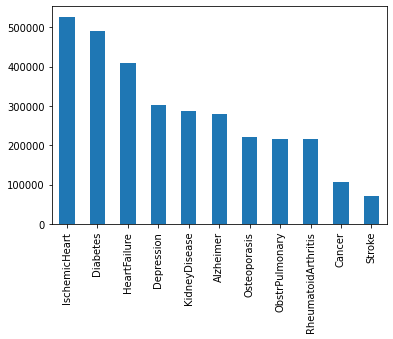

In [29]:
count = diag.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

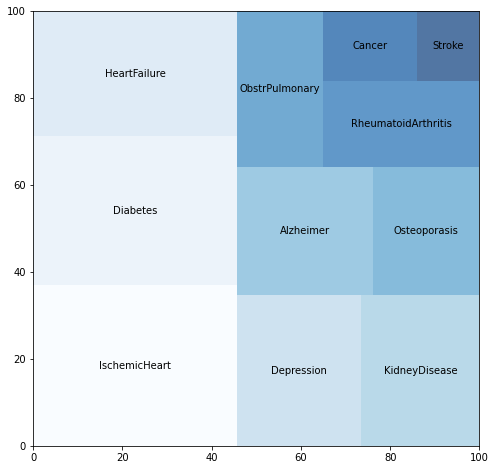

In [30]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = count.to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.Blues(np.linspace(0,2,22))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
#plt.title('Tree map of Most Frequent Items')
#plt.axis('off')
#plt.show()

### Run Apriori Algorithm and Association Rules

In [31]:
frequent_itemsets = apriori(diag, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296
1,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684
2,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989
3,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856
4,(Depression),(Diabetes),0.434364,0.705953,0.347886,0.800910,1.134509,0.041246,1.476957


In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296
1,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684
2,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989
3,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856
4,(Depression),(Diabetes),0.434364,0.705953,0.347886,0.800910,1.134509,0.041246,1.476957
...,...,...,...,...,...,...,...,...,...
1433,(HeartFailure),"(ObstrPulmonary, KidneyDisease, IschemicHeart,...",0.591221,0.161344,0.141990,0.240165,1.488521,0.046600,1.103733
1434,(IschemicHeart),"(HeartFailure, KidneyDisease, ObstrPulmonary, ...",0.759334,0.149972,0.141990,0.186994,1.246857,0.028112,1.045537
1435,(ObstrPulmonary),"(HeartFailure, KidneyDisease, IschemicHeart, D...",0.312688,0.264699,0.141990,0.454097,1.715522,0.059222,1.346944
1436,(KidneyDisease),"(ObstrPulmonary, HeartFailure, IschemicHeart, ...",0.412772,0.200694,0.141990,0.343992,1.714013,0.059150,1.218440


In [33]:
#rules = rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

In [34]:
rules1 = rules[(rules['support'] >= 0.3)&(rules['lift'] >= 1)&(rules['confidence'] >= 0.7)].sort_values("lift",ascending=False)

### Create New Column with a Set of Antecedents and Consequents Rules - To merge with original Dataset

In [35]:
rules1["ante_set"] = rules1["antecedents"].apply(lambda x: tuple(x))
rules1["con_set"] = rules1["consequents"].apply(lambda x: tuple(x))

In [36]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
369,(KidneyDisease),"(IschemicHeart, Diabetes)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(IschemicHeart, Diabetes)"
61,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)"
366,"(KidneyDisease, IschemicHeart)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(KidneyDisease, IschemicHeart)","(Diabetes,)"
42,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)"
405,(HeartFailure),"(IschemicHeart, Diabetes)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(IschemicHeart, Diabetes)"


In [37]:
rules1['conditions'] = rules1['ante_set'] + rules1['con_set']
#rules['conditions'] = rules.apply(lambda x: x['ante_set'].union(x['con_set']), axis=1)

In [38]:
rules1.shape

(20, 12)

In [39]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,conditions
369,(KidneyDisease),"(IschemicHeart, Diabetes)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(IschemicHeart, Diabetes)","(KidneyDisease, IschemicHeart, Diabetes)"
61,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)"
366,"(KidneyDisease, IschemicHeart)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(KidneyDisease, IschemicHeart)","(Diabetes,)","(KidneyDisease, IschemicHeart, Diabetes)"
42,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)","(KidneyDisease, Diabetes)"
405,(HeartFailure),"(IschemicHeart, Diabetes)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(IschemicHeart, Diabetes)","(HeartFailure, IschemicHeart, Diabetes)"


AttributeError: module 'matplotlib' has no attribute 'yticks'

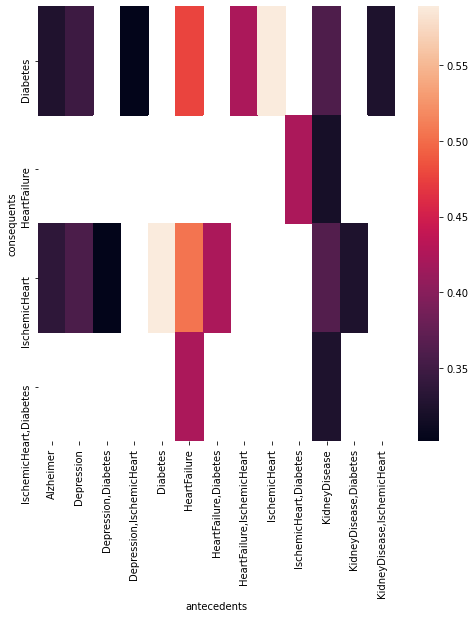

In [40]:
# Replace frozen sets with strings
rules1['antecedents'] = rules1['antecedents'].apply(lambda a: ','.join(list(a)))
rules1['consequents'] = rules1['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules1.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot)

# Format and display plot
plt.yticks(rotation=0)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'yticks'

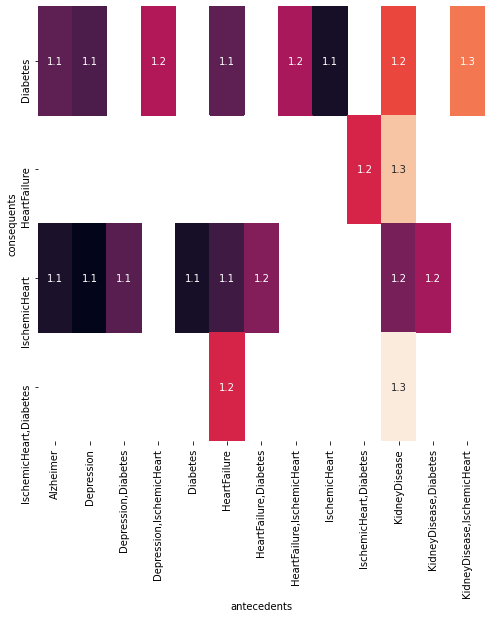

In [41]:
# Import seaborn under its standard alias
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules1.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

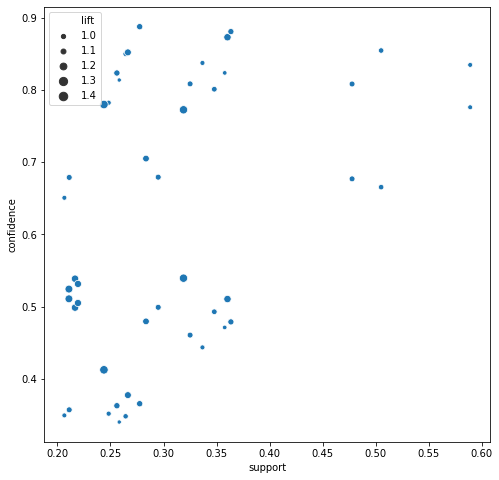

In [42]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.0075
# frequent_itemsets = apriori(diag, min_support = 0.0075, 
#                          use_colnames = True, max_len = 2)
frequent_itemsets = apriori(diag, min_support = 0.2, 
                         use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
# rules =association_rules(frequent_itemsets, metric = "support", 
#                           min_threshold = 0.0)
rules =association_rules(frequent_itemsets, metric = "lift", 
                          min_threshold = 1.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

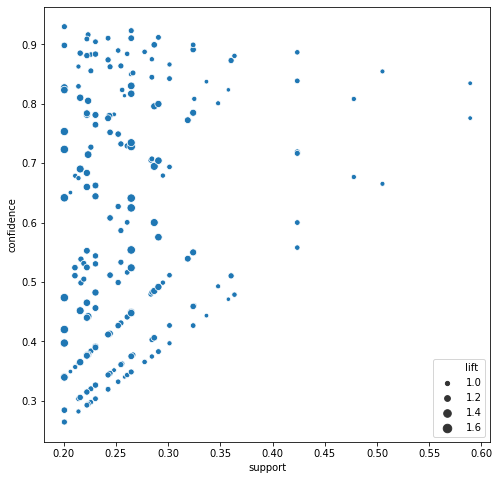

In [43]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.0075
# frequent_itemsets = apriori(diag, min_support = 0.0075, 
#                          use_colnames = True, max_len = 2)
frequent_itemsets = apriori(diag, min_support = 0.2, 
                         use_colnames = True)

# Generate association rules without performing additional pruning
# rules =association_rules(frequent_itemsets, metric = "support", 
#                           min_threshold = 0.0)
rules_1 =association_rules(frequent_itemsets, metric = "lift", 
                          min_threshold = 1.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules_1)
plt.show()

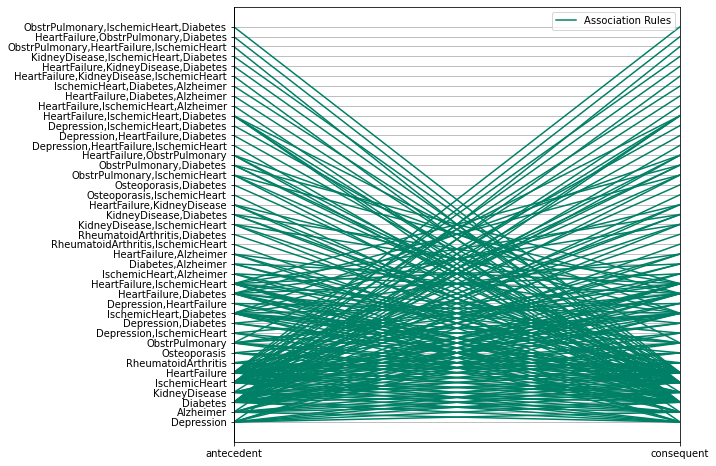

In [44]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
# frequent_itemsets = apriori(diag, min_support = 0.05, 
#                          use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
# rules = association_rules(frequent_itemsets, metric = 'confidence', 
#                           min_threshold = 0.50)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
rules_1['ante_set'] = rules_1['antecedents'].apply(lambda antecedent: list(antecedent))
rules_1['con_set'] = rules_1['consequents'].apply(lambda consequent: list(consequent))
# rules_1["ante_set"] = rules_1["antecedents"].apply(lambda x: list(x))
# rules_1["con_set"] = rules_1["consequents"].apply(lambda x: list(x))

rules_1['antecedent'] = rules_1['ante_set'].apply(lambda antecedent: ','.join(antecedent))
rules_1['consequent'] = rules_1['con_set'].apply(lambda consequent:','.join(consequent))
rules_1['rule'] = 'Association Rules'
coords_1 = rules_1[['antecedent','consequent','rule']]

# Generate parallel coordinates plot
parallel_coordinates(coords_1, 'rule', colormap = 'summer')
# plt.legend([])
#plt.show()

In [ ]:
rules_1.shape

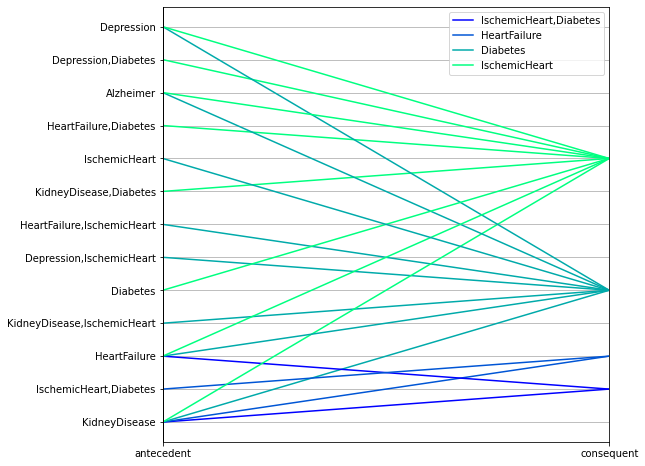

In [70]:
from pandas.plotting import parallel_coordinates

rules_2 = rules_1[(rules_1['support'] >= 0.3)&(rules_1['lift'] >= 1)&(rules_1['confidence'] >= 0.7)].sort_values("lift",ascending=False)
# Compute the frequent itemsets
# frequent_itemsets = apriori(diag, min_support = 0.05, 
#                          use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
# rules = association_rules(frequent_itemsets, metric = 'confidence', 
#                           min_threshold = 0.50)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
rules_2['ante_set'] = rules_2['antecedents'].apply(lambda antecedent: list(antecedent))
rules_2['con_set'] = rules_2['consequents'].apply(lambda consequent: list(consequent))
# rules_1["ante_set"] = rules_1["antecedents"].apply(lambda x: list(x))
# rules_1["con_set"] = rules_1["consequents"].apply(lambda x: list(x))

rules_2['antecedent'] = rules_2['ante_set'].apply(lambda antecedent: ','.join(antecedent))
rules_2['consequent'] = rules_2['con_set'].apply(lambda consequent:','.join(consequent))
rules_2['rule'] = rules_2['consequent']
coords_2 = rules_2[['antecedent','consequent','rule']]


# Generate parallel coordinates plot
parallel_coordinates(coords_2, 'rule', colormap = 'winter')#color=('#556270', '#4ECDC4', '#C7F464'))
# plt.legend([])
#plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

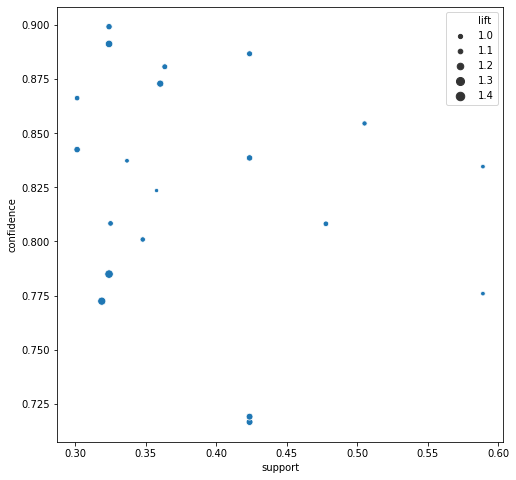

In [46]:
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules_2)
plt.show()

In [47]:
rules_2.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,antecedent,consequent,rule
117,(HeartFailure),"(IschemicHeart, Diabetes)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,[HeartFailure],"[IschemicHeart, Diabetes]",HeartFailure,"IschemicHeart,Diabetes","IschemicHeart,Diabetes"
116,"(IschemicHeart, Diabetes)",(HeartFailure),0.589180,0.591221,0.423662,0.719070,1.216245,0.075326,1.455090,"[IschemicHeart, Diabetes]",[HeartFailure],"IschemicHeart,Diabetes",HeartFailure,HeartFailure
37,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,[KidneyDisease],[HeartFailure],KidneyDisease,HeartFailure,HeartFailure
26,(IschemicHeart),(Diabetes),0.759334,0.705953,0.589180,0.775917,1.099106,0.053126,1.312226,[IschemicHeart],[Diabetes],IschemicHeart,Diabetes,Diabetes
93,(KidneyDisease),"(IschemicHeart, Diabetes)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,[KidneyDisease],"[IschemicHeart, Diabetes]",KidneyDisease,"IschemicHeart,Diabetes","IschemicHeart,Diabetes"
2,(Depression),(Diabetes),0.434364,0.705953,0.347886,0.800910,1.134509,0.041246,1.476957,[Depression],[Diabetes],Depression,Diabetes,Diabetes
32,(HeartFailure),(Diabetes),0.591221,0.705953,0.477801,0.808159,1.144777,0.060426,1.532761,[HeartFailure],[Diabetes],HeartFailure,Diabetes,Diabetes
11,(Alzheimer),(Diabetes),0.402142,0.705953,0.325065,0.808333,1.145025,0.041172,1.534159,[Alzheimer],[Diabetes],Alzheimer,Diabetes,Diabetes
6,(Depression),(IschemicHeart),0.434364,0.759334,0.357706,0.823517,1.084526,0.027879,1.363683,[Depression],[IschemicHeart],Depression,IschemicHeart,IschemicHeart
27,(Diabetes),(IschemicHeart),0.705953,0.759334,0.589180,0.834588,1.099106,0.053126,1.454955,[Diabetes],[IschemicHeart],Diabetes,IschemicHeart,IschemicHeart


In [48]:
rules_3 = rules_2

In [49]:
rules_3["ante_set"] = rules_3["antecedents"].apply(lambda x: tuple(x))
rules_3["con_set"] = rules_3["consequents"].apply(lambda x: tuple(x))
rules_3['conditions'] = rules_3['ante_set'] + rules_3['con_set']

In [50]:
rules_3.shape

(20, 15)

In [51]:
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,antecedent,consequent,rule,conditions
93,(KidneyDisease),"(IschemicHeart, Diabetes)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(IschemicHeart, Diabetes)",KidneyDisease,"IschemicHeart,Diabetes","IschemicHeart,Diabetes","(KidneyDisease, IschemicHeart, Diabetes)"
37,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)",KidneyDisease,HeartFailure,HeartFailure,"(KidneyDisease, HeartFailure)"
90,"(KidneyDisease, IschemicHeart)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(KidneyDisease, IschemicHeart)","(Diabetes,)","KidneyDisease,IschemicHeart",Diabetes,Diabetes,"(KidneyDisease, IschemicHeart, Diabetes)"
24,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)",KidneyDisease,Diabetes,Diabetes,"(KidneyDisease, Diabetes)"
117,(HeartFailure),"(IschemicHeart, Diabetes)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(IschemicHeart, Diabetes)",HeartFailure,"IschemicHeart,Diabetes","IschemicHeart,Diabetes","(HeartFailure, IschemicHeart, Diabetes)"
116,"(IschemicHeart, Diabetes)",(HeartFailure),0.589180,0.591221,0.423662,0.719070,1.216245,0.075326,1.455090,"(IschemicHeart, Diabetes)","(HeartFailure,)","IschemicHeart,Diabetes",HeartFailure,HeartFailure,"(IschemicHeart, Diabetes, HeartFailure)"
48,"(Depression, IschemicHeart)",(Diabetes),0.357706,0.705953,0.301345,0.842438,1.193335,0.048822,1.866235,"(Depression, IschemicHeart)","(Diabetes,)","Depression,IschemicHeart",Diabetes,Diabetes,"(Depression, IschemicHeart, Diabetes)"
114,"(HeartFailure, IschemicHeart)",(Diabetes),0.505207,0.705953,0.423662,0.838590,1.187885,0.067009,1.821746,"(HeartFailure, IschemicHeart)","(Diabetes,)","HeartFailure,IschemicHeart",Diabetes,Diabetes,"(HeartFailure, IschemicHeart, Diabetes)"
91,"(KidneyDisease, Diabetes)",(IschemicHeart),0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861,"(KidneyDisease, Diabetes)","(IschemicHeart,)","KidneyDisease,Diabetes",IschemicHeart,IschemicHeart,"(KidneyDisease, Diabetes, IschemicHeart)"
115,"(HeartFailure, Diabetes)",(IschemicHeart),0.477801,0.759334,0.423662,0.886691,1.167723,0.060852,2.123987,"(HeartFailure, Diabetes)","(IschemicHeart,)","HeartFailure,Diabetes",IschemicHeart,IschemicHeart,"(HeartFailure, Diabetes, IschemicHeart)"


In [52]:
df1_rules_3 = df1.merge(rules_3, on="conditions")

In [53]:
df1_rules_3_group= df1_rules_3[[
           "ClaimID",
           "PotentialFraud",
           "conditions",
           "lift",
           "confidence"]]

In [54]:
df1_rules_3_group

,ClaimID,PotentialFraud,conditions,lift,confidence
0,CLM55364,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
1,CLM71278,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
2,CLM341380,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
3,CLM664205,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
4,CLM68646,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
...,...,...,...,...,...
33546,CLM169441,NaN,"(KidneyDisease, HeartFailure)",1.306488,0.772424
33547,CLM614263,NaN,"(KidneyDisease, HeartFailure)",1.306488,0.772424
33548,CLM427024,NaN,"(KidneyDisease, HeartFailure)",1.306488,0.772424
33549,CLM249668,NaN,"(KidneyDisease, HeartFailure)",1.306488,0.772424


In [55]:
not_na = ~df1_rules_3_group["PotentialFraud"].isna()

In [56]:
df1_rules_3_group = df1_rules_3_group[not_na]

In [57]:
df1_rules_3_group

,ClaimID,PotentialFraud,conditions,lift,confidence
0,CLM55364,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
1,CLM71278,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
2,CLM341380,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
3,CLM664205,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
4,CLM68646,No,"(Diabetes, IschemicHeart)",1.099106,0.834588
...,...,...,...,...,...
33413,CLM293247,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424
33414,CLM536471,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424
33415,CLM539950,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424
33416,CLM452678,No,"(KidneyDisease, HeartFailure)",1.306488,0.772424


/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

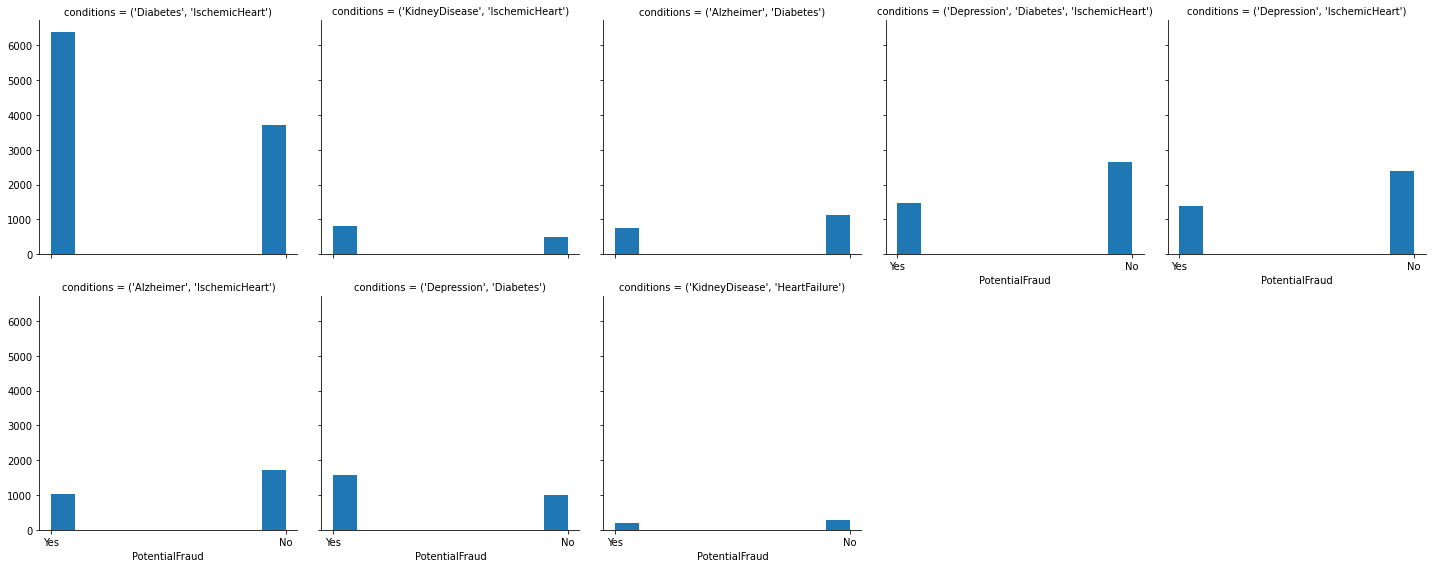

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
g = sns.FacetGrid(df1_rules_3_group, col="conditions", col_wrap=5,size=4)
g = g.map(plt.hist, "PotentialFraud")

### Combining df1 with Rules

In [59]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer_x,HeartFailure_x,KidneyDisease_x,Cancer_x,ObstrPulmonary_x,Depression_x,Diabetes_x,IschemicHeart_x,Osteoporasis_x,RheumatoidArthritis_x,Stroke_x,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,Depression_y,Alzheimer_y,RheumatoidArthritis_y,Diabetes_y,KidneyDisease_y,IschemicHeart_y,Stroke_y,Osteoporasis_y,ObstrPulmonary_y,HeartFailure_y,Cancer_y,conditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [60]:
df1.shape

(693603, 77)

In [61]:
df1_rules = df1.merge(rules1, on="conditions")

In [62]:
df1_rules.shape

(33551, 88)

In [63]:
df1_rules.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer_x,HeartFailure_x,KidneyDisease_x,Cancer_x,ObstrPulmonary_x,Depression_x,Diabetes_x,IschemicHeart_x,Osteoporasis_x,RheumatoidArthritis_x,Stroke_x,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,Depression_y,Alzheimer_y,RheumatoidArthritis_y,Diabetes_y,KidneyDisease_y,IschemicHeart_y,Stroke_y,Osteoporasis_y,ObstrPulmonary_y,HeartFailure_y,Cancer_y,conditions,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
0,233,BENE11205,CLM55364,2009-06-13,2009-06-16,PRV51277,4000,PHY399849,PHY432334,NaN,2009-06-13,78650,1068.0,2009-06-16,230,78659,25000,4240,41401,4019,V5863,V462,53081,412,NaN,3722.0,NaN,NaN,NaN,NaN,NaN,Train,in,1939-02-01,NaN,0,1,0,Arkansas,430,12,12,0,0,0,0,0,0,1,1,0,0,0,4000,1068,660,80,0,2,1,10,4.0,4,70.0,No,0,0,0,Diabetes,0,IschemicHeart,0,0,0,0,0,"(Diabetes, IschemicHeart)",Diabetes,IschemicHeart,0.705953,0.759334,0.58918,0.834588,1.099106,0.053126,1.454955,"(Diabetes,)","(IschemicHeart,)"
1,1404,BENE12285,CLM71278,2009-10-09,2009-10-13,PRV56818,6000,PHY319162,PHY319162,PHY312200,2009-10-09,71595,1068.0,2009-10-13,491,71596,41400,25000,42789,78060,NaN,NaN,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Train,in,1911-06-01,NaN,1,1,0,Texas,653,12,12,0,0,0,0,0,0,1,1,0,0,0,6000,1068,360,310,0,2,1,6,5.0,5,98.0,No,0,0,0,Diabetes,0,IschemicHeart,0,0,0,0,0,"(Diabetes, IschemicHeart)",Diabetes,IschemicHeart,0.705953,0.759334,0.58918,0.834588,1.099106,0.053126,1.454955,"(Diabetes,)","(IschemicHeart,)"
2,1405,BENE12285,CLM341380,2009-05-05,2009-05-05,PRV56580,60,PHY329663,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V591,1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1911-06-01,NaN,1,1,0,Texas,653,12,12,0,0,0,0,0,0,1,1,0,0,0,6000,1068,360,310,0,2,0,2,NaN,1,98.0,No,0,0,0,Diabetes,0,IschemicHeart,0,0,0,0,0,"(Diabetes, IschemicHeart)",Diabetes,IschemicHeart,0.705953,0.759334,0.58918,0.834588,1.099106,0.053126,1.454955,"(Diabetes,)","(IschemicHeart,)"
3,1406,BENE12285,CLM664205,2009-11-04,2009-11-04,PRV56758,300,PHY320350,PHY426365,NaN,NaN,NaN,0.0,NaN,NaN,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1911-06-01,NaN,1,1,0,Texas,653,12,12,0,0,0,0,0,0,1,1,0,0,0,6000,1068,360,310,0,2,0,1,NaN,1,98.0,No,0,0,0,Diabetes,0,IschemicHeart,0,0,0,0,0,"(Diabetes, IschemicHeart)",Diabetes,IschemicHeart,0.705953,0.759334,0.58918,0.834588,1.099106,0.053126,1.454955,"(Diabetes,)","(IschemicHeart,)"
4,1621,BENE12559,CLM68646,2009-09-19,2009-09-20,PRV55981,10000,PHY428577,PHY428577,NaN,2009-09-19,4599,1068.0,2009-09-20,237,41071,53081,41402,4019,3569,41401,V1079,25000,4148,NaN,66.0,4019.0,NaN,NaN,NaN,NaN,Train,in,1924-03-01,NaN,1,1,0,Pennsylvania,560,12,12,0,0,0,0,0,0,1,1,0,0,0,10000,1068,710,130,0,2,2,10,2.0,2,86.0,No,0,0,0,Diabetes,0,IschemicHeart,0,0,0,0,0,"(Diabetes, IschemicHeart)",Diabetes,IschemicHeart,0.705953,0.759334,0.58918,0.834588,1.099106,0.053126,1.454955,"(Diabetes,)","(IschemicHeart,)"


In [64]:
df1_rules.groupby("PotentialFraud").size()

PotentialFraud
No     16955
Yes    10019
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd66a96e810>,
      dtype=object)

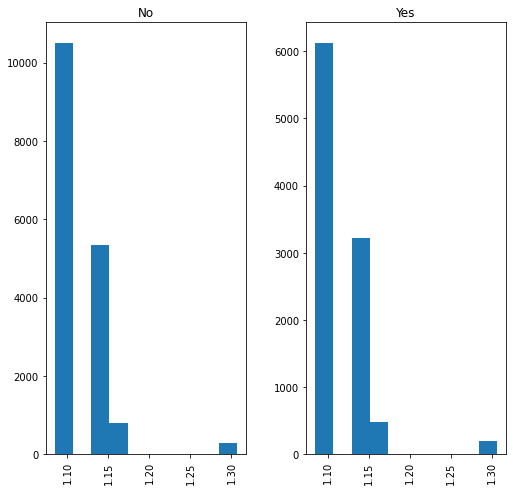

In [65]:
df1_rules[["lift","PotentialFraud"]].hist(by = "PotentialFraud")

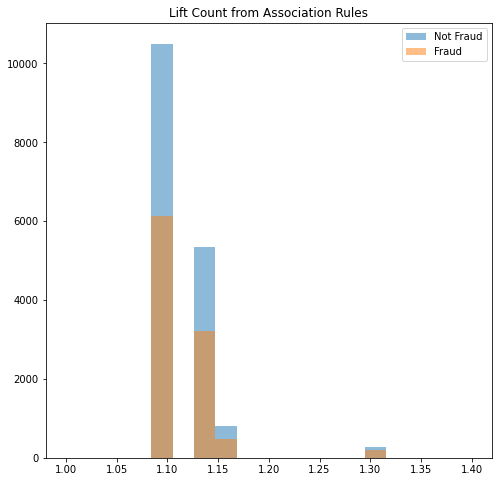

In [66]:
from matplotlib import pyplot

x = df1_rules[df1_rules["PotentialFraud"]=="No"]["lift"]
y = df1_rules[df1_rules["PotentialFraud"]=="Yes"]["lift"]


bins = np.linspace(1.0, 1.4, 20)
pyplot.hist(x, bins, alpha=0.5, label='Not Fraud')
pyplot.hist(y, bins, alpha=0.5, label='Fraud')
pyplot.legend(loc='upper right')
pyplot.title("Lift Count from Association Rules")
pyplot.show()

### Analyse Results with Diagnosis and Procedure Codes

In [67]:
df_ip = pd.read_csv("../data/code_specialty_ip.csv")
df_op = pd.read_csv("../data/code_specialty_op.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
df_ip.shape

(40474, 73)

In [ ]:
df_op.shape

In [ ]:
df_ipop = pd.concat([df_ip,df_op],join='inner').merge(provider, on="Provider")

In [ ]:
df_ipop.head()

In [ ]:
df_ipop.shape

In [ ]:
df_ipop.columns

In [ ]:
df_ipop = df_ipop[["ClaimID", 'cardiology', 'urology', 'endocrinology', 'emergency', 'general', 'infectious', 'oncology', 'hematology', 'psychiatry', 'neurology', 'pulmonology', 'gastroenterology', 'ob-gyn', 'dermatology', 'orthopedics', 'congenital', 'neonatology']]

In [ ]:
df_ipop

In [ ]:
df_codes = df_ipop

In [ ]:
df1_rules_3_group

In [ ]:
preconditions = df1_rules_3_group[['conditions']]

In [ ]:
preconditions

In [ ]:
#preconditions['conditions'] = preconditions['conditions'].apply(lambda t: list(t))

In [ ]:
preconditions = preconditions.groupby(['ClaimID','conditions']).size().unstack()

In [ ]:
preconditions = preconditions.fillna(0)

In [ ]:
preconditions

In [ ]:
# from itertools import permutations

In [ ]:
# flattened = [item for condition in preconditions for item in condition]
# items = list(set(flattened))

In [ ]:
# items

In [ ]:
# rules = list(permutations(items, 2))

In [ ]:
# print(rules)
# print(len(rules))

In [ ]:
# from mlxtend.preprocessing import TransactionEncoder
# encoder = TransactionEncoder().fit(rules)
# onehot = encoder.transform(rules)
# onehot = pd.DataFrame(onehot, columns = encoder.columns_)
# onehot = onehot.reset_index()
# preconditions = preconditions.reset_index()
# result = pd.concat([preconditions, onehot], axis=1, join='inner')
# result = result.drop(["conditions","index"], axis=1)
# result

In [ ]:
df_codes

In [ ]:
df_codes.replace(2, 1,inplace=True)
df_codes.replace(3, 1,inplace=True)
df_codes.replace(4, 1,inplace=True)
df_codes.replace(5, 1,inplace=True)
df_codes.replace(6, 1,inplace=True)
df_codes.replace(7, 1,inplace=True)
df_codes.replace(8, 1,inplace=True)
df_codes.replace(9, 1,inplace=True)
df_codes.replace(10, 1,inplace=True)
df_codes.replace(11, 1,inplace=True)
df_codes.replace(12, 1,inplace=True)
df_codes.replace(13, 1,inplace=True)
df_codes.replace(14, 1,inplace=True)
df_codes.replace(15, 1,inplace=True)

In [ ]:
result = preconditions.merge(df_codes, on="ClaimID", how="inner")

In [ ]:
result.shape

In [ ]:
result = result.set_index("ClaimID")

In [ ]:
result

In [ ]:
result1 = result

In [ ]:
result1

In [ ]:
for col in result1.columns:
    result1[col].map({1: 'hi'}) 

In [ ]:
result1

In [ ]:
result1['(Alzheimer, Diabetes)'].map({1: 'hi'})

In [ ]:
for col in result1.columns:
    result1[col].replace(1,col,inplace=True)
    
cols = [   "(Alzheimer, Diabetes)",
           "(Alzheimer, IschemicHeart)",
           "(Depression, Diabetes)",        
           "(Depression, Diabetes, IschemicHeart)",
           "(Depression, IschemicHeart)",
           "(Diabetes, IschemicHeart)",
           "Diabetes, IschemicHeart, HeartFailure)",
           "(Diabetes, KidneyDisease, IschemicHeart)",
           "(KidneyDisease, HeartFailure)",
           "(KidneyDisease, IschemicHeart)"
           ]

result1["conditions"] = result1[cols].values.tolist()
result1["conditions"] = result1["conditions"].apply(lambda x: list(filter(lambda a: a != 0, x)))
result1["conditions"] = result1["conditions"].apply(lambda x: tuple(x))
result1["conditions"] = result1["conditions"].apply(lambda x: tuple(x))

In [ ]:
import seaborn as sns

frequent_itemsets = apriori(result, min_support = 0.02, use_colnames = True)
rules_4 =association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.0)
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules_4)
plt.show()

In [ ]:
rules_4.shape

In [ ]:
rules_4

In [ ]:
from pandas.plotting import parallel_coordinates

rules_4 = rules_4[(rules_1['support'] >= 0.1)&(rules_4['lift'] >= 1)&(rules_4['confidence'] >= 0.7)].sort_values("lift",ascending=False)

In [ ]:
rules_4['ante_set'] = rules_4['antecedents'].apply(lambda antecedent: list(antecedent))#[0] if len(antecedent) > 1 else list(antecedent))
rules_4['con_set'] = rules_4['consequents'].apply(lambda consequent: list(consequent))#[0] if len(consequent) > 1 else list(consequent))

In [ ]:
rules_4['conditions'] = rules_4['ante_set'] + rules_4['con_set']

In [ ]:
rules_4

In [ ]:
rules_5 = rules_4

In [ ]:
rules_5['ante_set'] = ['neonatology',
                       'cardiology, urology',
                       '(Diabetes, IschemicHeart), infectious',
                       'infectious, (Diabetes, IschemicHeart, HeartFailure)',
                       'infections',
                       '(Depression, Diabetes, IschemicHeart), infectious',
                       '(Depression, IschemicHeart), infectious',
                       '(Diabetes, IschemicHeart), urology',
                       'urology, (Diabetes, IschemicHeart, HeartFailure)',
                       'urology'
                      ]

In [ ]:
rules_5['con_set'] = ['general',
                      'general',
                      'general',
                      'general',
                      'general',
                      'general',
                      'general',
                      'general',
                      'general',
                      'general',
                     ]

In [ ]:
rules_5['antecedent'] = rules_5['ante_set']#.apply(lambda antecedent: ','.join(str(antecedent)))
rules_5['consequent'] = rules_5['con_set']#.apply(lambda consequent:','.join(str(consequent)))

# rules_4['antecedent'] = rules_4['ante_set'].apply(lambda a: convert_tuples(a))
# rules_4['consequent'] = rules_4['con_set'].apply(lambda c: convert_tuples(c))
rules_5['rule'] = 'Association Rule'
coords_5 = rules_5[['antecedent','consequent','rule']]


# Generate parallel coordinates plot
parallel_coordinates(coords_5, 'rule', colormap = 'winter')#color=('#556270', '#4ECDC4', '#C7F464'))
# plt.legend([])
#plt.show()

In [ ]:
rules_5

In [ ]:
df1_rules_5 = df1.merge(rules_5, on="conditions")

In [ ]:
df_ipop_heat1 = df_ipop[[
    "Alzheimer",
    "HeartFailure",
    "KidneyDisease",
    "Cancer",
    "ObstrPulmonary",
    "Depression",
    "Diabetes",
    "IschemicHeart",
    "Osteoporasis",
    "RheumatoidArthritis",
    "Stroke"]]
df_ipop_heat2 = df_ipop[[
    "general",
           "cardiology", 
           "endocrinology", 
           "infectious",
           "urology",
           "orthopedics",   
           "gastroenterology",
           "neurology",
           "oncology",
           "hematology",
           "emergency",
           "pulmonology",
           "psychiatry",
           "dermatology",
           "ob-gyn",
           "congenital",
           "neonatology"]]

In [ ]:
heat_map = sns.heatmap(df_ipop_heat1.corr())

In [ ]:
heat_map = sns.heatmap(df_ipop_heat2.corr())

In [ ]:
df1_rules_3_codes = df1_rules_3.merge(df_ipop, on="ClaimID")